<p align="center">
  26 de Novembro de 2021
</p>

<br>
<br>

<p align="center">
  <img height="150" src="https://www.ccs.ufscar.br/imagens/ufscar-preto.png">
</p>

<p align="center">
  <img height="150" src="https://site.dc.ufscar.br/static/media/LOGO-DC.295bfc37.svg">
</p>

---

<h1 align="center">Trabalho de Aprendizado de Máquina</h1>


<h3 align="center">Profº. Dr. Diego Furtado Silva</h3>


<p align="center">
  Bárbara Dib Oliveira (769717) <br>
  Igor Teixeira Machado (769708) <br>
  Lucas Machado Cid (769841) <br>
  Vinicius Quaresma da Luz (769836)
</p>

---

# Importa as dependências e os dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

Obs.: Incluímos no repositório um `requirements.txt` com as dependências do projeto. Caso ocorra algum erro de importação, o comando abaixo deve resolver o problema.

```
pip install -r requirements.txt
```

Existe a *possibilidade* de termos mais pacotes neste arquivo do que realmente precisamos. :)

## Lendo o CSV

In [2]:
df = pd.read_csv('datasets/tripadvisor_review.csv')
df.head()

User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54

Como a coluna `User ID` é irrelevante, podemos descartá-la.

In [3]:
df.drop('User ID', axis='columns', inplace=True)
df.head()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0        0.93         1.8        2.29        0.62        0.80        2.42   
1        1.02         2.2        2.66        0.64        1.42        3.18   
2        1.22         0.8        0.54        0.53        0.24        1.54   
3        0.45         1.8        0.29        0.57        0.46        1.52   
4        0.51         1.2        1.18        0.57        1.54        2.02   

   Category 7  Category 8  Category 9  Category 10  
0        3.19        2.79        1.82         2.42  
1        3.21        2.63        1.86         2.32  
2        3.18        2.80        1.31         2.50  
3        3.18        2.96        1.57         2.86  
4        3.18        2.78        1.18         2.54

Agora temos apenas informações sobre as reviews dos lugares. Todas as colunas estão na mesma escala, a saber:

- 4 - Excelente
- 3 - Bom
- 2 - Regular
- 1 - Ruim
- 0 - Terrível

Portanto, não há necessidade de normalização e podemos pular esta etapa.

Os dados possuem poucos valores extremos nas colunas, e isso pode ser averiguado no gráfico de violino abaixo, que mostra a distribuição de valores e, para além da linha interna, as ocorrências extremas (que são poucas).

<AxesSubplot:>

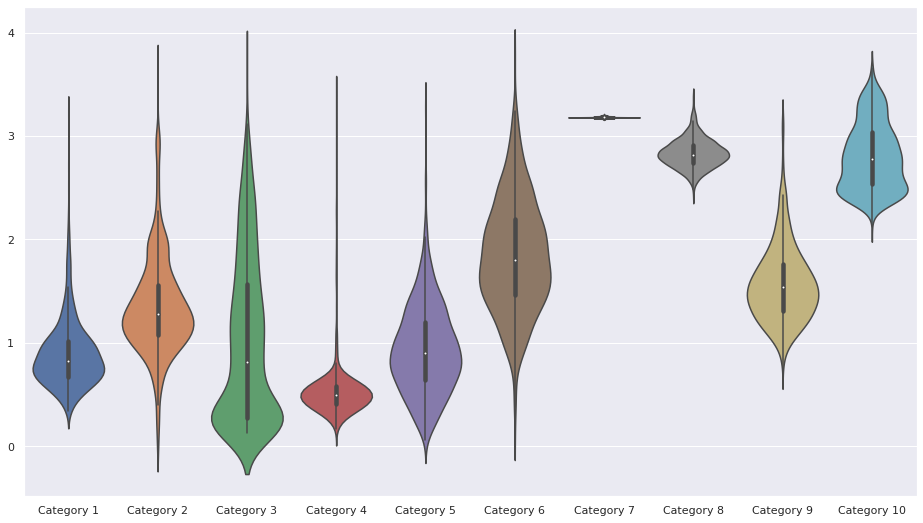

In [4]:
sb.set(rc={'figure.figsize':(16,9)})
sb.violinplot(data=df, scale='width')

Ademais, como cada algoritmo irá efetuar uma operação diferente com o *dataframe*, mantemos uma cópia.

In [5]:
original_df = df.copy()

# K-Means

O **K-Means** é um dos mais populares algoritmos de aprendizado não supervisionado, sucesso em parte devido à simplicidade de sua utilização. Ainda que não seja o mais sofisticado algoritmo de agrupamento, é suficiente em vários casos. Soma-se a isto o fato de que os dados utilizados estão em mesma escala, sem outliers que possam *arrastar* os centróides para valores irrazoáveis.

O **K-Means** funciona criando sobre os dados $k \in \R$ centróides **aleatórios**. Então, para cada ponto $P$ do conjunto de dados, calculamos a distância euclidiana entre $P$ e cada um dos $k$ centróides, e atribuímos o ponto ao centróide mais próximo. Então, os centróides são reposicionados para o ponto médio entre os pontos que lhe foram atribuídos, e assim sucessivamente. O processo é interrompido quando a movimentação do centróide se torna desprezível.

Mais formalmente, particionamos um conjunto de observações de tamanho $n$ em subconjuntos de tamanho $k \le n$, buscando a **minimização da soma de quadrados de cada subconjunto** (*cluster*). Considerando $S = {S_1, S_2, \cdots, S_k}$ o nosso conjunto de *clusters*, podemos representar isto da maneira abaixo:

$$
\text{arg}_S \text{min} \sum{}_{i=1}^k \sum{}_{x \in S_i} \| x - \mu_i \|^2 = \text{arg}_S \text{min} \sum{}_{i=1}^k |S_i| \text{Var} S_i
$$

Abaixo, a quantidade de clusters é variada de 2 a 20.

In [6]:
results = pd.DataFrame(columns=['n_clusters', 'silhouette_score', 'inertia'])

for n in range(2, 20):
    print('Usando ' + str(n) + ' clusters')
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df)

    # Adiciona os resultados ao dataframe
    results.loc[n] = [int(n), silhouette_score(df, kmeans.labels_), kmeans.inertia_]

results


Usando 2 clusters
Usando 3 clusters
Usando 4 clusters
Usando 5 clusters
Usando 6 clusters
Usando 7 clusters
Usando 8 clusters
Usando 9 clusters
Usando 10 clusters
Usando 11 clusters
Usando 12 clusters
Usando 13 clusters
Usando 14 clusters
Usando 15 clusters
Usando 16 clusters
Usando 17 clusters
Usando 18 clusters
Usando 19 clusters


n_clusters  silhouette_score      inertia
2          2.0          0.300853  1179.753443
3          3.0          0.205728  1052.385914
4          4.0          0.168998   961.729359
5          5.0          0.164249   890.816161
6          6.0          0.161716   836.968725
7          7.0          0.164437   792.331436
8          8.0          0.167672   750.532477
9          9.0          0.166949   719.642903
10        10.0          0.167227   687.083820
11        11.0          0.159495   668.485561
12        12.0          0.158609   642.890040
13        13.0          0.153904   625.528663
14        14.0          0.148860   605.944559
15        15.0          0.140181   595.952835
16        16.0          0.141545   579.743516
17        17.0          0.148142   568.675111
18        18.0          0.149402   555.737106
19        19.0          0.141117   539.759904

## Gráfico do Silhouette Score

<AxesSubplot:xlabel='n_clusters', ylabel='silhouette_score'>

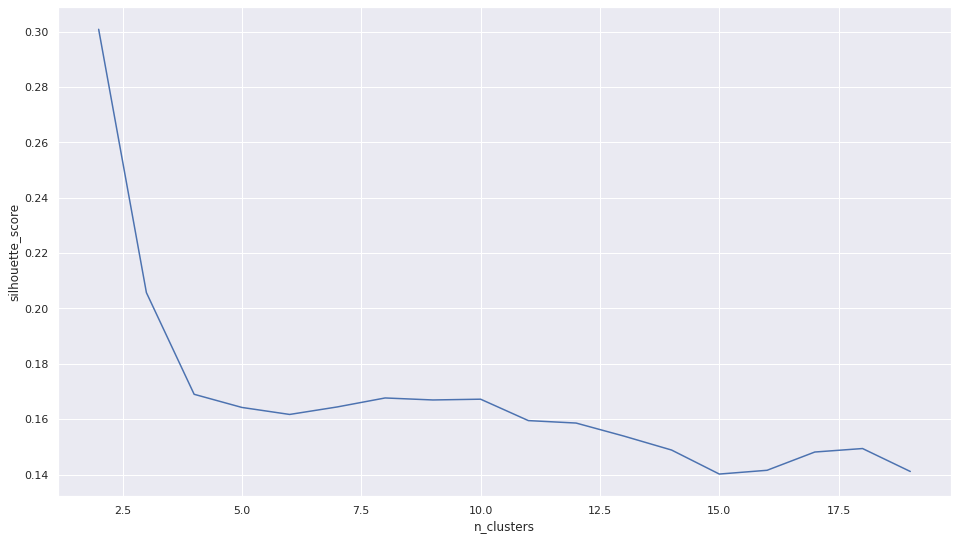

In [7]:
sb.lineplot(x='n_clusters', y='silhouette_score', data=results)

## Gráfico da Inércia

<AxesSubplot:xlabel='n_clusters', ylabel='inertia'>

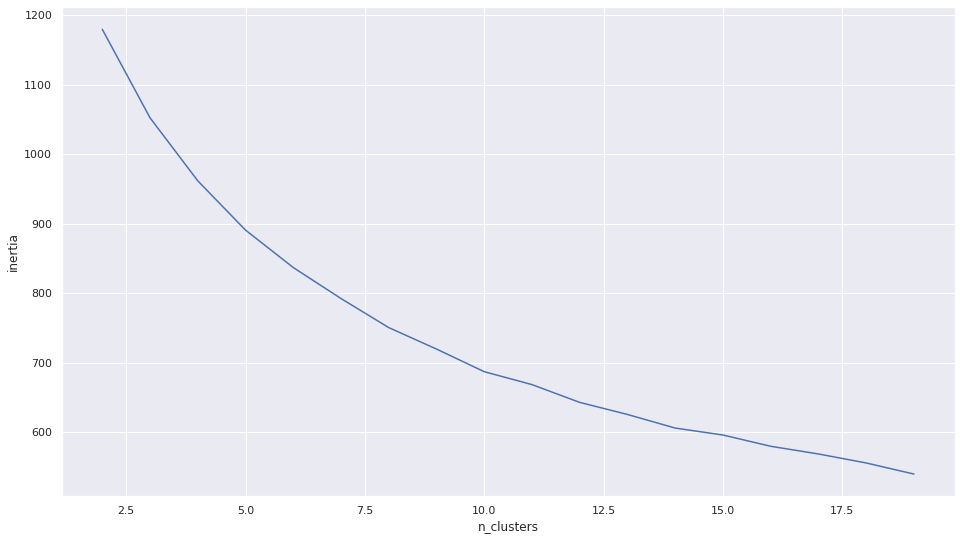

In [8]:
sb.lineplot(x='n_clusters', y='inertia', data=results)

Fixando $k=5$, obtemos os gráficos abaixo.

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)

df['cluster'] = kmeans.labels_

algorithm_results = pd.DataFrame(columns=['algorithm', 'n_clusters', 'silhouette_score'])
algorithm_results.loc[0] = ['K-Means', 5, silhouette_score(df, kmeans.labels_)]

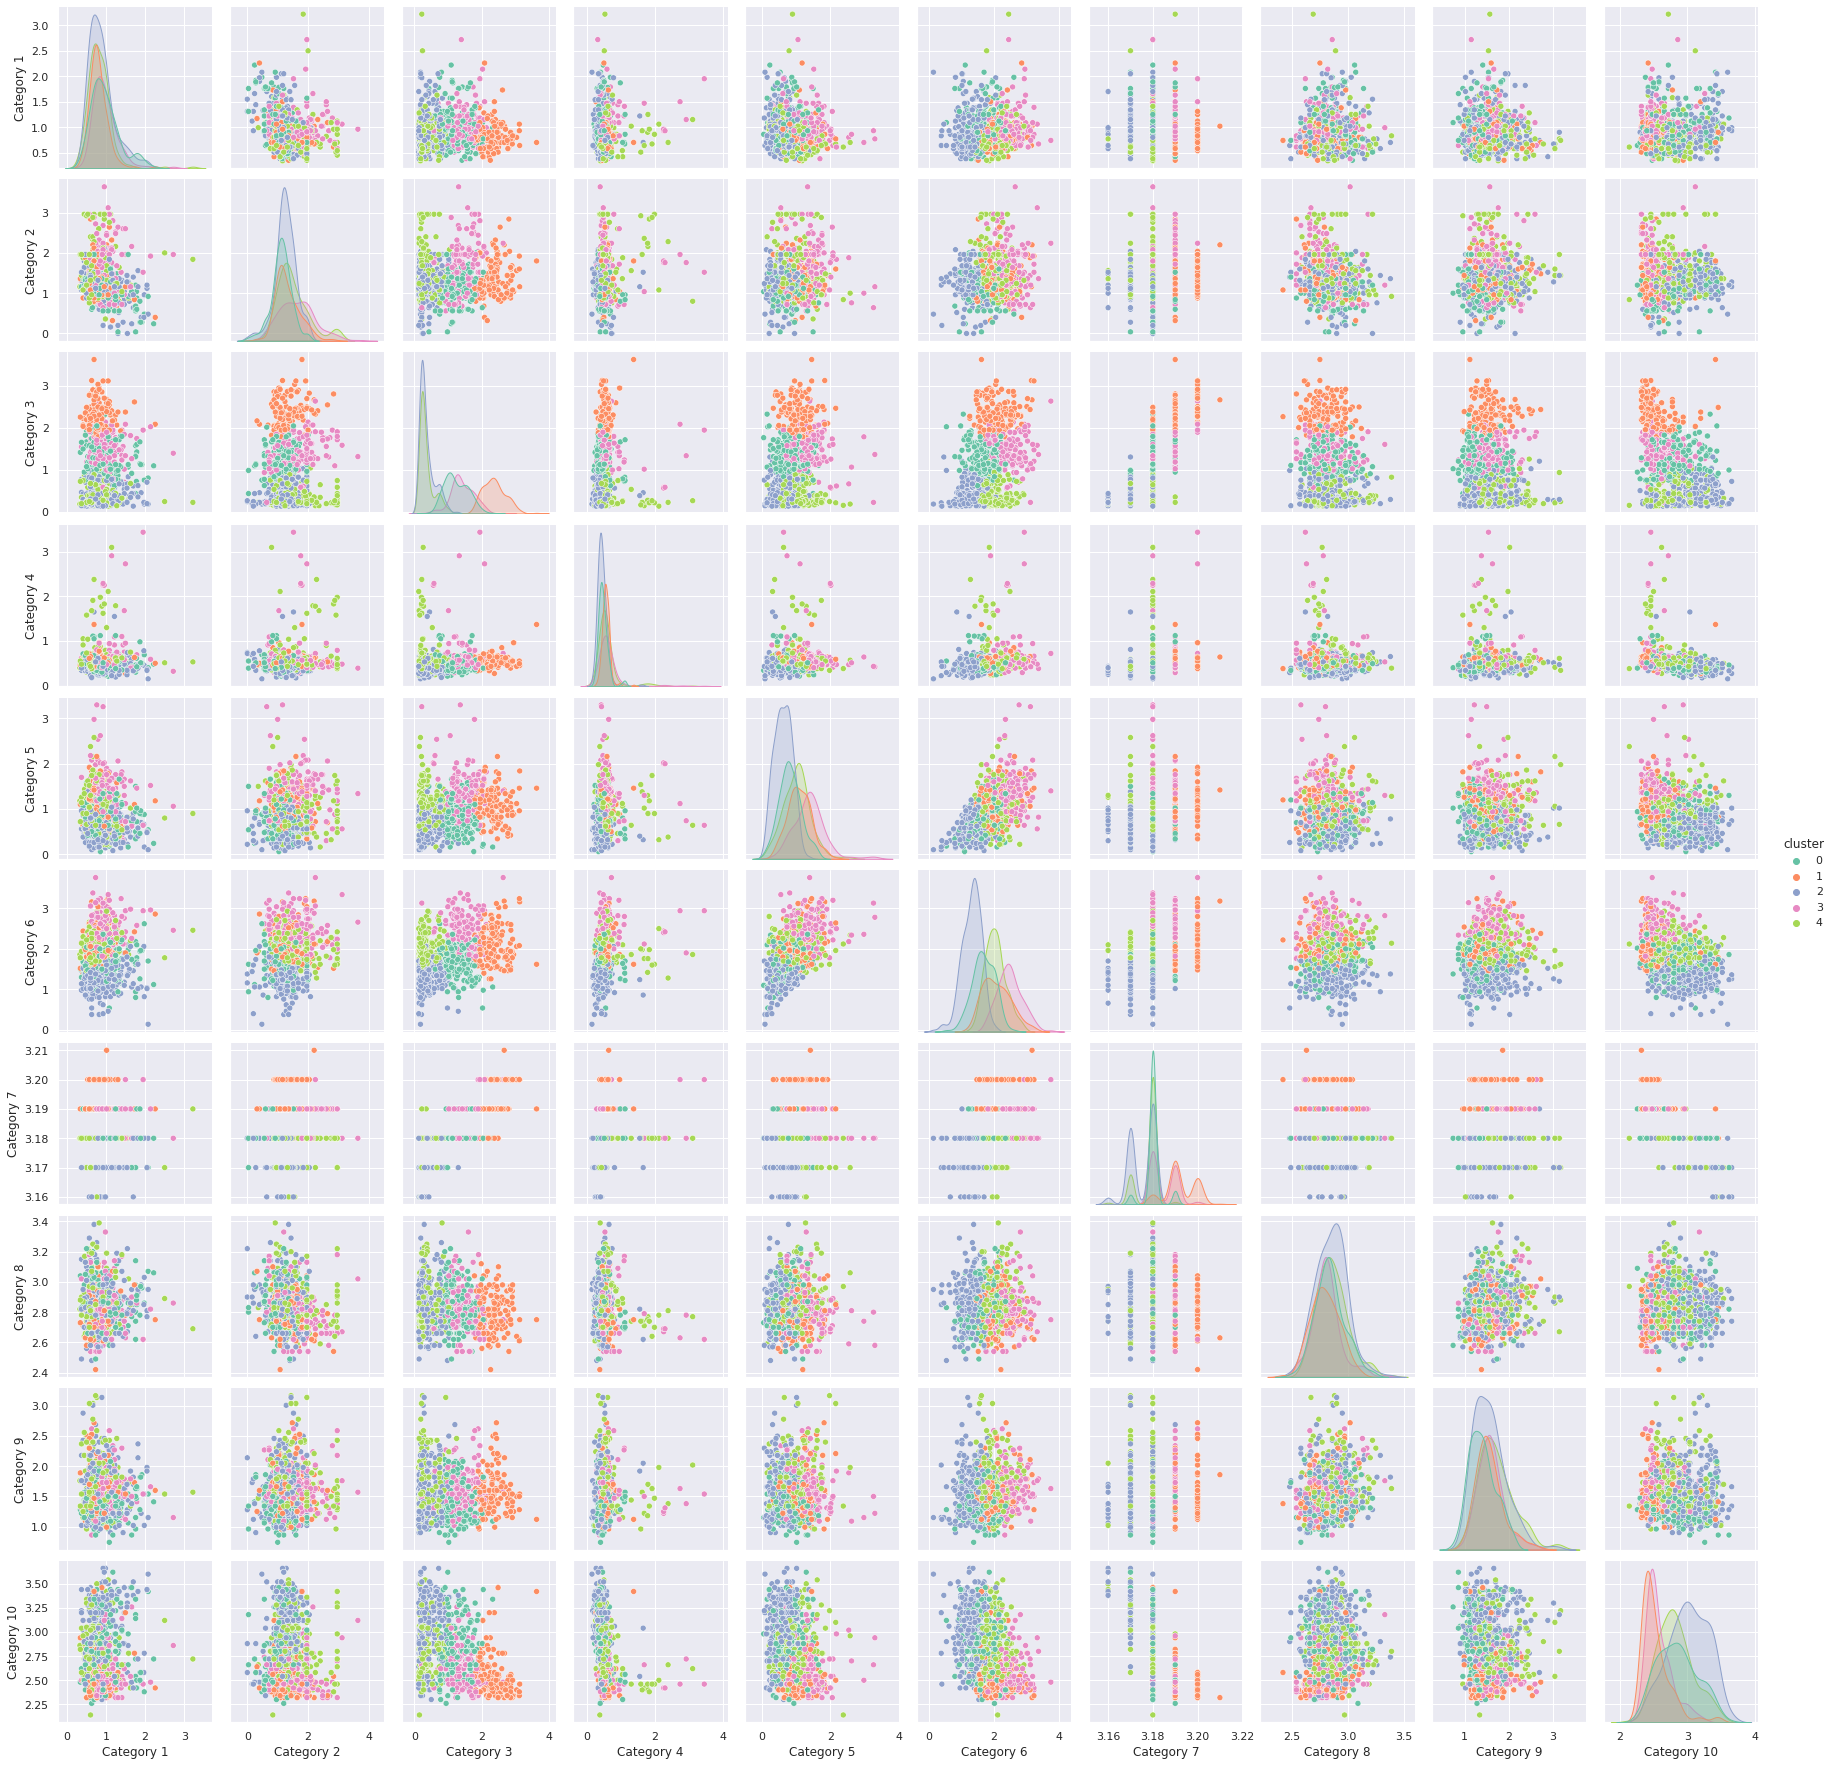

In [10]:
sb.set(rc={'figure.figsize':(16,9)})
sb.pairplot(df, hue='cluster', palette='Set2', kind='scatter')

Pela observação do gráfico, percebemos que, ainda que não haja quantidade significativa de *outliers*, os pontos estão muito próximos uns dos outros. Com isso, é no mínimo compreensível a má performance do **K-Means**. Pelo mesmo motivo, percebemos o *silhouette score* muito próximo a zero (ou seja, os pontos estão sempre bem próximos às fronteiras de decisão).

# Hierarchical Clustering (Ward)

*Hierarchical clustering* (Agrupamento hierárquico) é um algoritmo muito utilizado para a clusterização de dados, isto é, o agrupamento de dados semelhantes em grupos (os chamados clusters). 

Como entrada deste algoritmo podemos passar um conjunto de dados ou uma matriz de distâncias. Como saída, obtemos um conjunto de clusters, que por sua vez contém dados que apresentam um certo grau de semelhança entre si. 

Existem duas categorias para esse algoritmo: Botton-up e Top-down. No Botton-up, em um primeiro momento, o algoritmo considera todos os dados disponíveis como clusters distintos; ele então calcula a distância entre cada um dos clusters (isto é, se esta já não tiver sido passada previamente para o algoritmo, através de uma matriz de distâncias) e seleciona o par que detém a menor dentre as que foram calculadas. Por fim, estes dois clusters são unificados e o processo se repete até que não seja mais possível realizar iterações ou até que se obtenha o número de grupos desejado (podendo este ser passado como hiperparâmetro). Já no Top-down o processo ocorre de maneira inversa; o algoritmo inicialmente considera a existência de apenas um único cluster, e a cada iteração gera um novo, baseado também na distância.

Para o cálculo da distância entre clusters existem diversas maneiras de se calcular a medida:
Single-linkage: A distância entre dois grupos é a menor distância entre dois pontos (um em cada grupo)
Complete-linkage: A distância entre dois grupos é a maior distância entre dois pontos (um em cada grupo)
Average-linkage: A distância entre dois grupos é a distância média entre os pares de pontos (nos grupos diferentes)
Centróide: A distância entre dois grupos é a distância entre os centróides de cada grupo
Ward: A distância entre dois grupos se baseia na variação de um determinado critério J que segue a expressão:

$$
J = \sum{}_{i=1}^k \sum{}_{x_j \in C_i} (x_j, \overline{x_i})
$$

Onde $k$ é o número de clusters,  $C_i$ contém os dados do cluster $i$ e ($x_j$, $x_i$) é a distância do ponto $x_j$, pertencente ao i-ésimo cluster, ao centróide $x_i$ deste mesmo cluster.  Basicamente, $J$ é a soma dos erros quadráticos das distâncias de um ponto ao seu centróide, para cada cluster. O ward busca minimizar a variação deste critério $J$ ao longo das iterações.

Entre os pontos positivos deste algoritmo temos sua fácil interpretabilidade e a possibilidade de não ter que definir um número de grupos inicialmente (esta decisão pode ser tomada depois de rodar o algoritmo). 


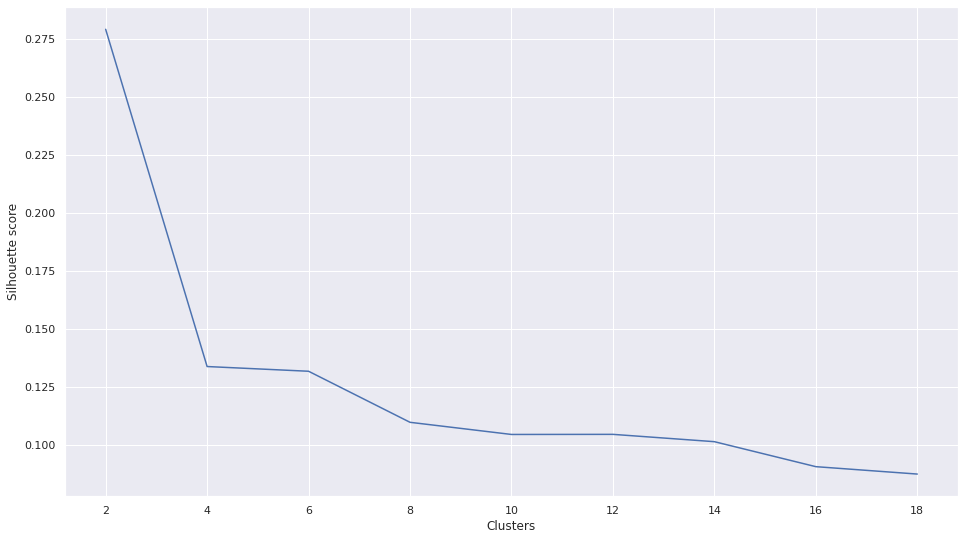

A melhor silhueta é 0.27931282832051946
O melhor número de clusters é 2


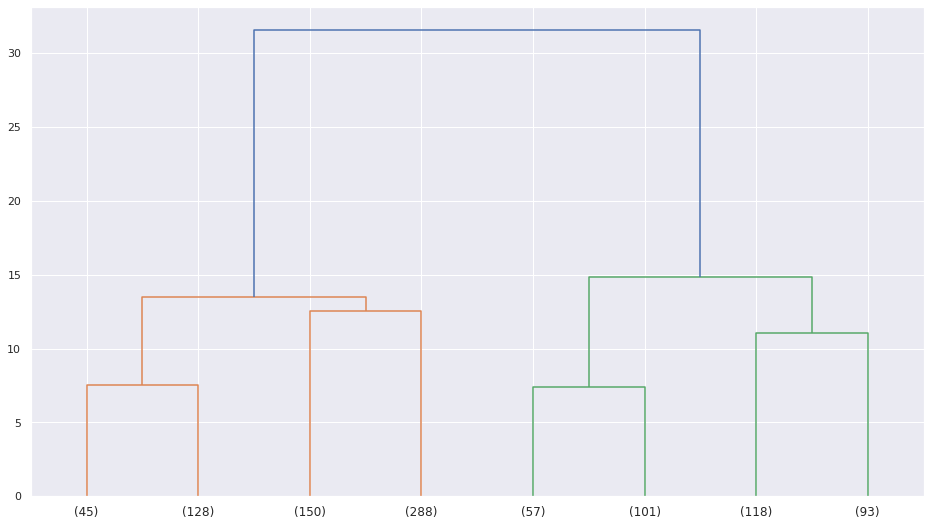

In [11]:
df = original_df.copy()

best_silhouette_score = -1;
best_model = None;
best_n = None;

silhouette_array = []

for i in range(2, 20, 2):
    agglomerative = AgglomerativeClustering(distance_threshold=None, n_clusters=i, compute_distances=True)
    model = agglomerative.fit(df)

    silhouette = silhouette_score(df, model.labels_)
    silhouette_array.append(silhouette)
    if(silhouette > best_silhouette_score):
        best_silhouette_score = silhouette
        best_model = model
        best_n = i

model = best_model
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)

for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
).astype(float)

plt.plot(range(2, 20, 2), silhouette_array)

plt.xlabel('Clusters')
plt.ylabel('Silhouette score')

plt.show()

print("A melhor silhueta é", best_silhouette_score)
print("O melhor número de clusters é", best_n)
dendrogram(linkage_matrix, truncate_mode="level", p=best_n)

algorithm_results.loc[1] = ['Hierarchical Clustering', best_n, best_silhouette_score]

plt.show()

# DBSCAN

O DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) é um algoritmo baseado em densidade capaz de identificar grupos em formatos arbitrários (não somente hiper esféricos, como os algoritmos descritos anteriormente). Além disso, consegue também reconhecer aqueles exemplos no conjunto de dados que não se enquadram em nenhum dos grupos formados, os ruídos (ou *noises*).

A densidade usada para o funcionamento do algoritmo é definida por dois importantes parâmetros relacionados a cada exemplo (ou ponto) p: **ε-vizinhança** e o **minPts**. O primeiro refere-se ao conjunto de pontos com distância **máxima** ε a um ponto p, enquanto o segundo indica um número mínimo de pontos na **ε-vizinhança** de p para considerá-lo um ponto que está em uma região densa (ou seja, em um grupo).

Em poucas palavras, o algoritmo funciona da seguinte maneira: para cada um dos pontos p do conjunto de dados, verifica-se se está ou não em uma **região densa** (ou seja, se tiver minPts ou mais pontos em sua ε-vizinhança). Se não estiver, p é classificado como ruído. Caso contrário, encontra-se todos os pontos que p alcança por densidade e os atribui a um mesmo grupo (inclusive o próprio p).


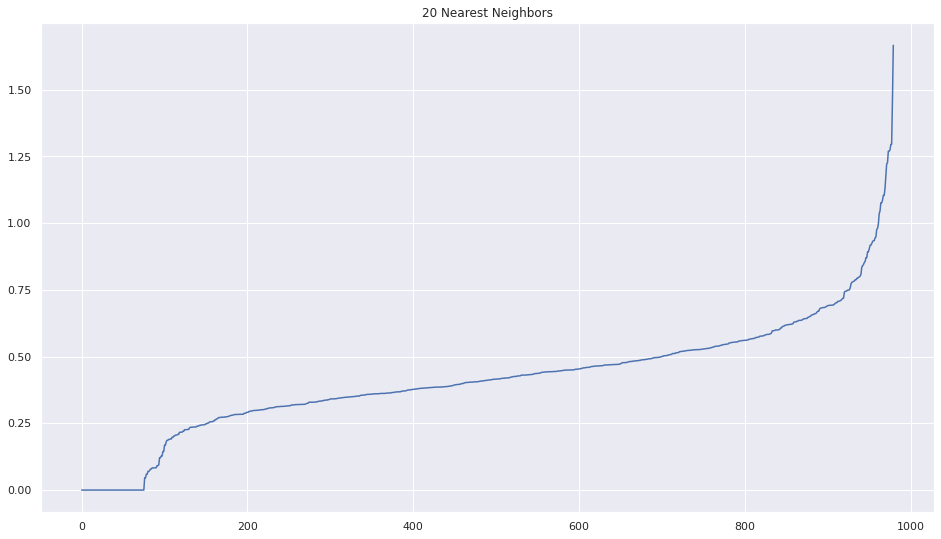

In [12]:
df = original_df.copy()

neighbors = NearestNeighbors(n_neighbors = 20)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.title("20 Nearest Neighbors")
plt.show()


In [13]:
df = original_df.copy()

db = DBSCAN(eps=0.75, min_samples=20)
db.fit(df)

df['cluster'] = db.labels_

results = pd.DataFrame(columns=['n_clusters', 'n_noise', 'silhouette_score'])
results.loc[0] = [np.delete(np.unique(df['cluster']), -1).size, list(df['cluster']).count(-1), metrics.silhouette_score(df, df['cluster'])]

algorithm_results.loc[2] = ['DBSCAN', np.delete(np.unique(df['cluster']), -1).size, metrics.silhouette_score(df, df['cluster'])]

results

n_clusters  n_noise  silhouette_score
0         1.0    167.0          0.280432

In [14]:
df

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0          0.93        1.80        2.29        0.62        0.80        2.42   
1          1.02        2.20        2.66        0.64        1.42        3.18   
2          1.22        0.80        0.54        0.53        0.24        1.54   
3          0.45        1.80        0.29        0.57        0.46        1.52   
4          0.51        1.20        1.18        0.57        1.54        2.02   
..          ...         ...         ...         ...         ...         ...   
975        0.74        1.12        0.30        0.53        0.88        1.38   
976        1.25        0.92        1.12        0.38        0.78        1.68   
977        0.61        1.32        0.67        0.43        1.30        1.78   
978        0.93        0.20        0.13        0.43        0.30        0.40   
979        0.93        0.56        1.13        0.51        1.34        2.36   

     Category 7  Category 8  Category 9  Category 10  cluster  
0          3.19        2.79        1.82         2.42        0  
1          3.21        2.63        1.86         2.32       -1  
2          3.18        2.80        1.31         2.50        0  
3          3.18        2.96        1.57         2.86        0  
4          3.18        2.78        1.18         2.54        0  
..          ...         ...         ...          ...      ...  
975        3.17        2.78        0.99         3.20        0  
976        3.18        2.79        1.34         2.80        0  
977        3.17        2.81        1.34         3.02        0  
978        3.18        2.98        1.12         2.46       -1  
979        3.18        2.87        1.34         2.40        0  

[980 rows x 11 columns]

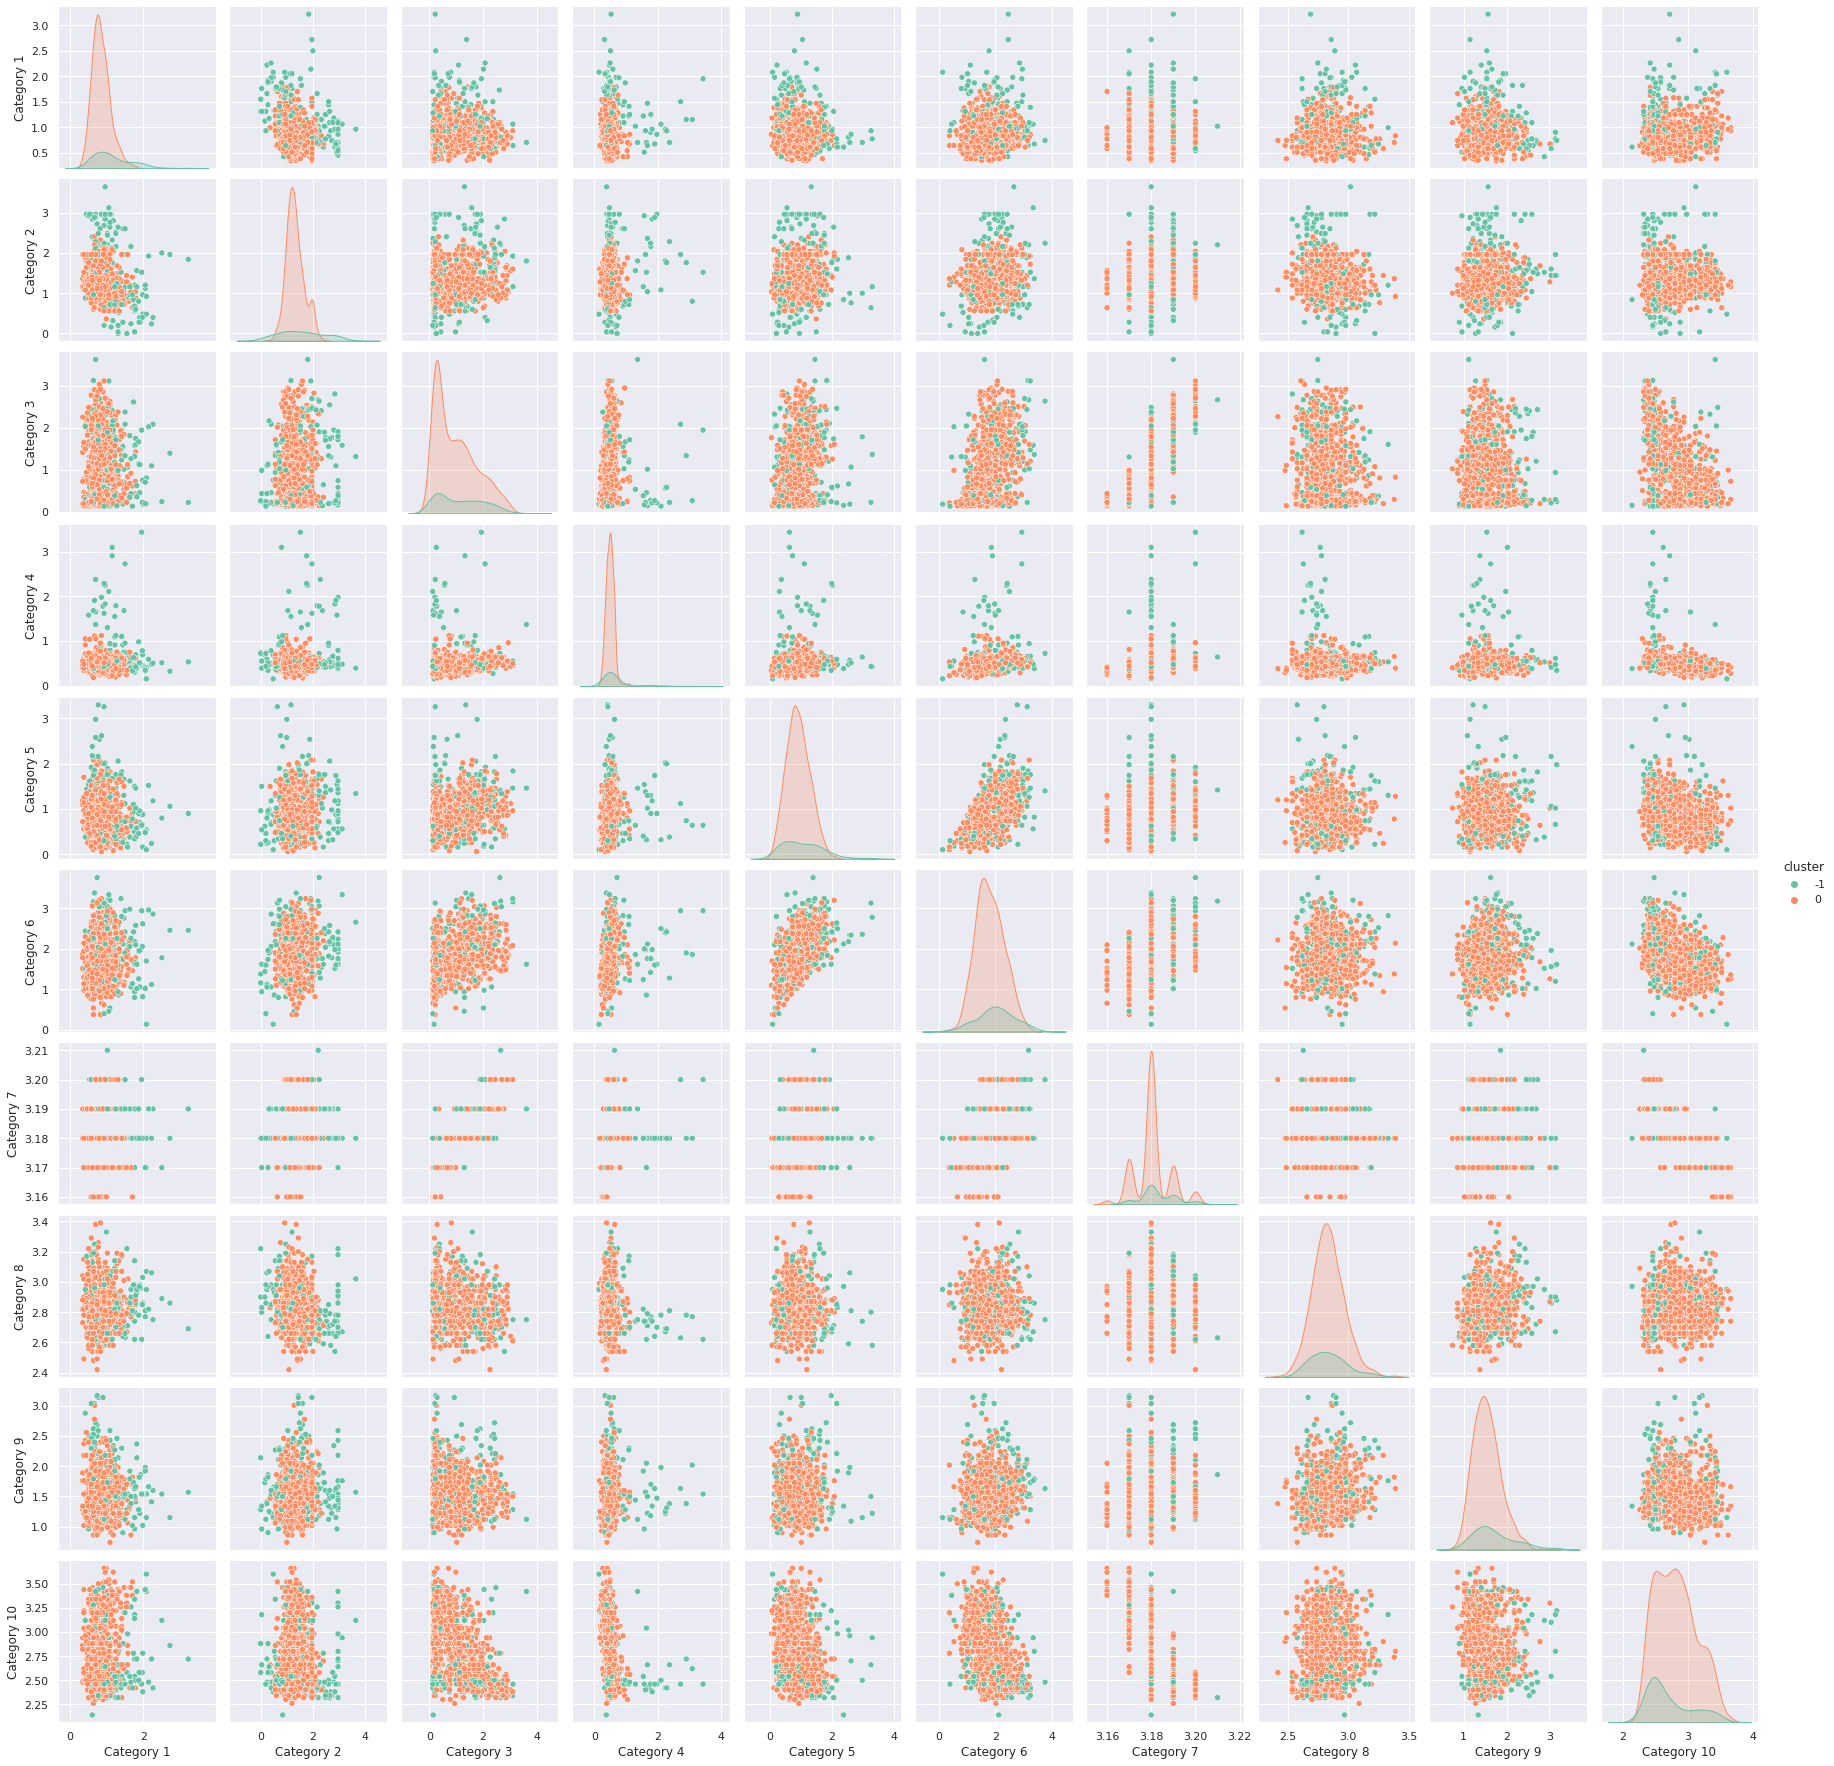

In [15]:
sb.pairplot(df, hue='cluster', palette='Set2', kind='scatter')

# Comparação entre os algoritmos

Usamos o silhoutte score como critério de comparação.

In [16]:
algorithm_results.sort_values('silhouette_score', ascending=False, inplace=True)

algorithm_results

algorithm n_clusters  silhouette_score
0                  K-Means          5          0.421587
2                   DBSCAN          1          0.280432
1  Hierarchical Clustering          2          0.279313

In [17]:
print(
"""\n\nConcluímos que o algoritmo {} obteve o melhor resultado, com {} clusters, e com silhouette_score de {}.\n
""".format(algorithm_results.iloc[0, 0], algorithm_results.iloc[0, 1], algorithm_results.iloc[0, 2]))



Concluímos que o algoritmo K-Means obteve o melhor resultado, com 5 clusters, e com silhouette_score de 0.42158664273832247.


